In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from math import *

print("The current directory is: ")
print(os.getcwd())
if not os.getcwd().endswith("Abaqus-Hardening-Seq-2-Seq-Project"):
    # Move up two directories
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
print("The current directory is: ")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project\notebooks\CP1000_RD_20C
The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project


In [3]:
from configs.chosen_project import *
from src.stage1_global_configs import *

chosen_project_path = "configs/global_config_CP1000_RD_20C.json"

global_configs = main_global_configs(chosen_project_path)

all_paths = global_configs['all_paths']
objectives = global_configs['objectives']


= Stage 1: Loading configs and all paths =

Welcome to Abaqus Seq2Seq flow curve calibration project

The configurations you have chosen: 

+--------------------------+------------------------------------------------------------------+
|      Global Configs      |                           User choice                            |
+--------------------------+------------------------------------------------------------------+
|         PROJECT          |                          CP1000_RD_20C                           |
|        OBJECTIVES        |        CHD2, CHD4, NDBR2p5, NDBR6, NDBR15, NDBR40, SH115         |
|       PROJECT_PATH       | c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project |
|    TRAINING_DATA_PATH    |                   training_data/CP1000_RD_20C                    |
|         LOG_PATH         |                        log/CP1000_RD_20C                         |
|       MODELS_PATH        |                       models/CP1000_RD_20C                    

### Plotting training and testing loss of LSTM and Transformer models

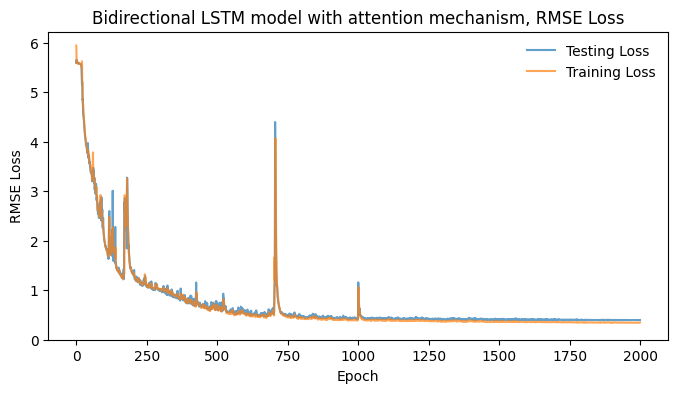

In [4]:
models_path = "models/CP1000_RD_20C_no_referenced_flow_curve"

train_losses = []
test_losses = []
for i in range(1, 3):
    train_losses.extend(np.load(f"{models_path}/LSTM/initial/train_losses_{i}_train_diff.npy", allow_pickle=True).tolist())
    test_losses.extend(np.load(f"{models_path}/LSTM/initial/test_losses_{i}_train_diff.npy", allow_pickle=True).tolist())

plt.figure(figsize=(8, 4))

plt.plot(test_losses, label='Testing Loss', alpha= 0.7)
plt.plot(train_losses, label='Training Loss', alpha= 0.7)
plt.title('Bidirectional LSTM model with attention mechanism, RMSE Loss')
plt.ylim(bottom=0)
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.legend(frameon=False)   

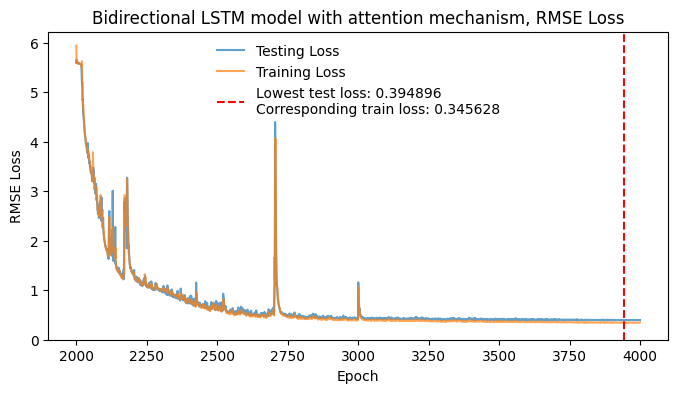

In [5]:

train_losses = []
test_losses = []
for i in range(1, 3):
    train_losses.extend(np.load(f"{models_path}/LSTM/initial/train_losses_{i}_train_diff.npy", allow_pickle=True).tolist())
    test_losses.extend(np.load(f"{models_path}/LSTM/initial/test_losses_{i}_train_diff.npy", allow_pickle=True).tolist())

plt.figure(figsize=(8, 4))

lowest_test_loss = min(test_losses)
epoch_lowest_test_loss = test_losses.index(lowest_test_loss)
corresponding_train_loss = train_losses[epoch_lowest_test_loss]

lowest_test_loss = round(lowest_test_loss, 6)
corresponding_train_loss = round(corresponding_train_loss, 6)

epochs = np.arange(2000, 4000)
plt.plot(epochs, test_losses, label=f'Testing Loss', alpha= 0.7)
plt.plot(epochs, train_losses, label=f'Training Loss', alpha= 0.7)
plt.axvline(x=epoch_lowest_test_loss+2000, color='r', linestyle='--', label=f'Lowest test loss: {lowest_test_loss}\nCorresponding train loss: {corresponding_train_loss}')
plt.title('Bidirectional LSTM model with attention mechanism, RMSE Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.ylim(bottom=0)
plt.legend(frameon=False)   

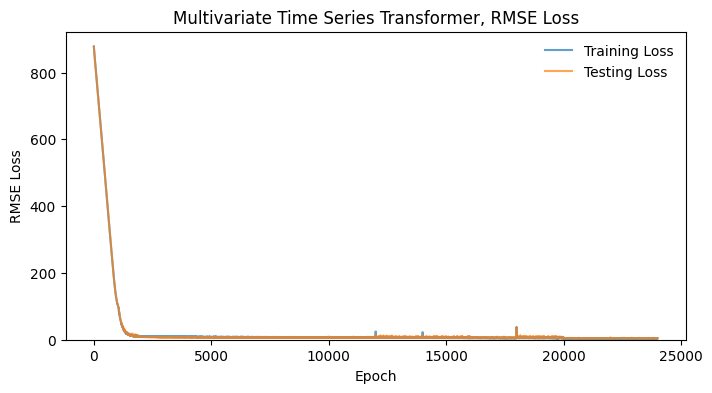

In [6]:

train_losses = []
test_losses = []
for i in range(1, 13):
    train_losses.extend(np.load(f"{models_path}/transformer/initial/train_losses_{i}.npy", allow_pickle=True).tolist())
    test_losses.extend(np.load(f"{models_path}/transformer/initial/test_losses_{i}.npy", allow_pickle=True).tolist())

plt.figure(figsize=(8, 4))

plt.plot(train_losses, label='Training Loss', alpha= 0.7)
plt.plot(test_losses, label='Testing Loss', alpha= 0.7)
plt.title('Multivariate Time Series Transformer, RMSE Loss')
plt.ylim(bottom=0)
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.legend(frameon=False)   

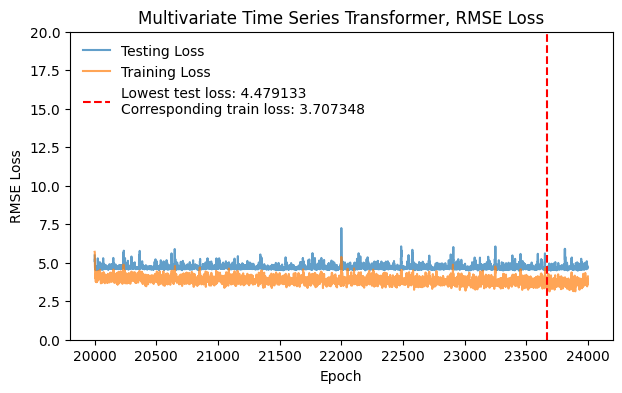

In [7]:

train_losses = []
test_losses = []
for i in range(11, 13):
    train_losses.extend(np.load(f"{models_path}/transformer/initial/train_losses_{i}.npy", allow_pickle=True).tolist())
    test_losses.extend(np.load(f"{models_path}/transformer/initial/test_losses_{i}.npy", allow_pickle=True).tolist())

plt.figure(figsize=(7, 4))

lowest_test_loss = min(test_losses)
epoch_lowest_test_loss = test_losses.index(lowest_test_loss)
corresponding_train_loss = train_losses[epoch_lowest_test_loss]

lowest_test_loss = round(lowest_test_loss, 6)
corresponding_train_loss = round(corresponding_train_loss, 6)

epochs = np.arange(20000, 24000)
plt.plot(epochs, test_losses, label=f'Testing Loss', alpha= 0.7)
plt.plot(epochs, train_losses, label=f'Training Loss', alpha= 0.7)
plt.axvline(x=epoch_lowest_test_loss+20000, color='r', linestyle='--', label=f'Lowest test loss: {lowest_test_loss}\nCorresponding train loss: {corresponding_train_loss}')
plt.title('Multivariate Time Series Transformer, RMSE Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.ylim(bottom=0, top=20)

plt.legend(frameon=False)   

# Loading the experiment data

In [8]:
import torch

training_data_path = "training_data/CP1000_RD_20C_divided_index_0"
models_path = "models/CP1000_RD_20C_no_referenced_flow_curve"

exp_source_original_all_unscaled = torch.load(f"{training_data_path}/exp_source_original_all_unscaled.pt")
exp_source_diff_all_unscaled = torch.load(f"{training_data_path}/exp_source_diff_all_unscaled.pt")

initial_train_source_diff_all = torch.load(f"{training_data_path}/initial_train_source_diff_all.pt")
initial_train_target_diff_last = torch.load(f"{training_data_path}/initial_train_target_diff_last.pt")

initial_test_source_diff_all = torch.load(f"{training_data_path}/initial_test_source_diff_all.pt")
initial_test_target_diff_last = torch.load(f"{training_data_path}/initial_test_target_diff_last.pt")

# Convert them to float32

exp_source_original_all_unscaled = exp_source_original_all_unscaled.float()
exp_source_diff_all_unscaled = exp_source_diff_all_unscaled.float()

initial_train_source_diff_all = initial_train_source_diff_all.float()
initial_train_target_diff_last = initial_train_target_diff_last.float()

initial_test_source_diff_all = initial_test_source_diff_all.float()
initial_test_target_diff_last = initial_test_target_diff_last.float()

print(f"Shape of exp_source_original_all_unscaled: {exp_source_original_all_unscaled.shape}")
print(f"Shape of exp_source_diff_all_unscaled: {exp_source_diff_all_unscaled.shape}")

# Check if it has NaN or infinite values

print(f"Number of NaN values in exp_source_original_all_unscaled: {np.isnan(exp_source_original_all_unscaled).sum()}")
print(f"Number of NaN values in exp_source_diff_all_unscaled: {np.isnan(exp_source_diff_all_unscaled).sum()}")

print(f"Number of infinite values in exp_source_original_all_unscaled: {np.isinf(exp_source_original_all_unscaled).sum()}")
print(f"Number of infinite values in exp_source_diff_all_unscaled: {np.isinf(exp_source_diff_all_unscaled).sum()}")

Shape of exp_source_original_all_unscaled: torch.Size([1, 100, 7])
Shape of exp_source_diff_all_unscaled: torch.Size([1, 99, 7])
Number of NaN values in exp_source_original_all_unscaled: 0
Number of NaN values in exp_source_diff_all_unscaled: 0
Number of infinite values in exp_source_original_all_unscaled: 0
Number of infinite values in exp_source_diff_all_unscaled: 0


In [9]:
# Define the device

training_env = "local" # Choose between "local" and "CSC"
if training_env == "local":
    device = "cpu"
else:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [10]:
from optimization.LSTM import *
from optimization.transformer import *

# Start loading the trained models

In [11]:
from optimization.LSTM import *

# Parameters
_, LSTM_source_len, LSTM_feature_size = initial_train_source_diff_all.shape
_, LSTM_target_len, LSTM_label_size = initial_train_target_diff_last.shape

hidden_size = 256
num_layers = 3
dropout = 0.001

bidirectional = True  # Set this flag to True or False as needed
use_attention = True  # Set this flag to True or False to enable/disable attention

# Initialize model, loss function, and optimizer
LSTM_model = LSTMModel(LSTM_feature_size, LSTM_label_size,
                  LSTM_source_len, LSTM_target_len,
                  hidden_size, num_layers,
                  dropout=dropout,
                  bidirectional=bidirectional, 
                  use_attention=use_attention).to(device)

LSTM_model.to(device)
LSTM_model.load_state_dict(torch.load(f"{models_path}/LSTM/initial/best_model_2_train_diff.pth"))

<All keys matched successfully>

In [12]:
# Parameters

training_data_path = "training_data/CP1000_RD_20C_divided_index_0"
models_path = "models/CP1000_RD_20C_no_referenced_flow_curve"

initial_train_source_original_all = torch.load(f"{training_data_path}/initial_train_source_original_all.pt")
initial_train_target_original_first = torch.load(f"{training_data_path}/initial_train_target_original_first.pt")
initial_test_source_original_all = torch.load(f"{training_data_path}/initial_test_source_original_all.pt")
initial_test_target_original_first = torch.load(f"{training_data_path}/initial_test_target_original_first.pt")

_, transformer_source_len, transformer_feature_size = initial_train_source_original_all.shape
_, transformer_label_size, _ = initial_train_target_original_first.shape

d_model = 256
n_heads = 16 # rule of thumb: d_model/n_heads = 16 or 32
num_layers = 4
dim_feedforward = 1024
# a larger feedforward dimension (often 2-4 times d_model) helps the model to process 
# and transform the information more effectively

activation_name = "relu" # "relu" or "gelu"
pos_enc_type="fixed" # "fixed" or "learnable"
encoder_layer_type="LayerNorm" # "LayerNorm" or "BatchNorm"
dropout = 0.01

# Initialize model, loss function, and optimizer

transformer_model = TransformerEncoder(transformer_feature_size, transformer_label_size, transformer_source_len,
                 d_model, n_heads, num_layers, dim_feedforward, 
                 activation_name, pos_enc_type, encoder_layer_type,
                 dropout=dropout).to(device)


transformer_model.to(device)
transformer_model.load_state_dict(torch.load(f"{models_path}/transformer/initial/best_model_12.pth"))

c:\Users\springnuance\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


<All keys matched successfully>

### Reconstruct the predicted flow curve

In [13]:
from modules.predict import *

scale_source = global_configs['model_config']['scale_source']
scale_target = global_configs['model_config']['scale_target']

exp_target_original_all = seq2seq_predict_without_referenced_flow_curve(transformer_model=transformer_model,
                                              LSTM_model=LSTM_model,
                                              exp_source_original_all=exp_source_original_all_unscaled,
                                              exp_source_diff_all=exp_source_diff_all_unscaled,
                                              scale_source=scale_source, 
                                              scale_target=scale_target,
                                            )

# Squeeze first and last dim and convert to np
exp_target_original_all = exp_target_original_all.squeeze(0).squeeze(0).detach().cpu().numpy()

### Plot the predicted flow curve

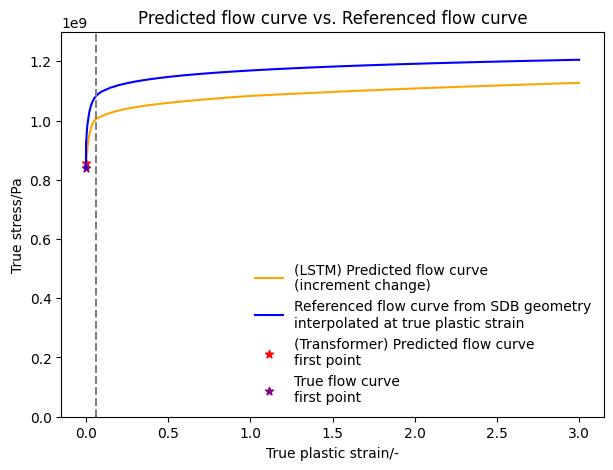

In [16]:
figure = plt.figure(figsize=(7, 5))

targets_path = all_paths['targets_path']

true_plastic_strain = np.load(f"{targets_path}/true_plastic_strain.npy", allow_pickle=True)
plt.plot(true_plastic_strain, exp_target_original_all, label="(LSTM) Predicted flow curve\n(increment change)", color='orange')

# We should also load the referenced flow curve from the SDB geometry
referenced_flow_curve_pd = pd.read_csv(f"{targets_path}/referenced_flow_curve.csv")
referenced_flow_curve = referenced_flow_curve_pd["stress/Pa"].values

plt.plot(true_plastic_strain, referenced_flow_curve, 
         label="Referenced flow curve from SDB geometry\ninterpolated at true plastic strain", color='blue')

# referenced_flow_curve_original_pd = pd.read_csv(f"{targets_path}/referenced_flow_curve_original.csv")
# referenced_flow_curve_original = referenced_flow_curve_original_pd["stress/Pa"].values
# original_plastic_strain = referenced_flow_curve_original_pd["strain/-"].values

# plt.plot(original_plastic_strain, referenced_flow_curve_original,
#          label="Referenced flow curve from SDB geometry original", color='purple', linestyle='--')

# scatter the first point with a star marker 
plt.scatter(true_plastic_strain[0], exp_target_original_all[0], label=f"(Transformer) Predicted flow curve\nfirst point", marker='*', color='red')
plt.scatter(true_plastic_strain[0], referenced_flow_curve[0], label="True flow curve\nfirst point", marker='*', color='purple')
        
# draw veritcal line at 0.05
plt.axvline(x=0.06, color='gray', linestyle='--')
plt.title("Predicted flow curve vs. Referenced flow curve")
plt.ylim(bottom=0, top=1.3e9)
plt.xlabel("True plastic strain/-")
plt.ylabel("True stress/Pa")
plt.legend(frameon=False)

In [17]:
### Now we would need to write the flow curve to the template files

import os
import shutil
from utils.IO import replace_flow_curve

templates_path = all_paths['templates_path']

for objective in objectives:
    if os.path.exists(f"temp/CP1000_RD_20C_divided_index_0/{objective}"):
        shutil.rmtree(f"temp/CP1000_RD_20C_divided_index_0/{objective}")
    shutil.copytree(f"{templates_path}/{objective}", f"temp/CP1000_RD_20C_divided_index_0/{objective}")    
    true_stress = exp_target_original_all
    replace_flow_curve(f"temp/CP1000_RD_20C_divided_index_0/{objective}/geometry.inp", true_plastic_strain, true_stress)


### Checking how the models perform on training data

torch.Size([9, 100, 7])
torch.Size([9, 99, 7])


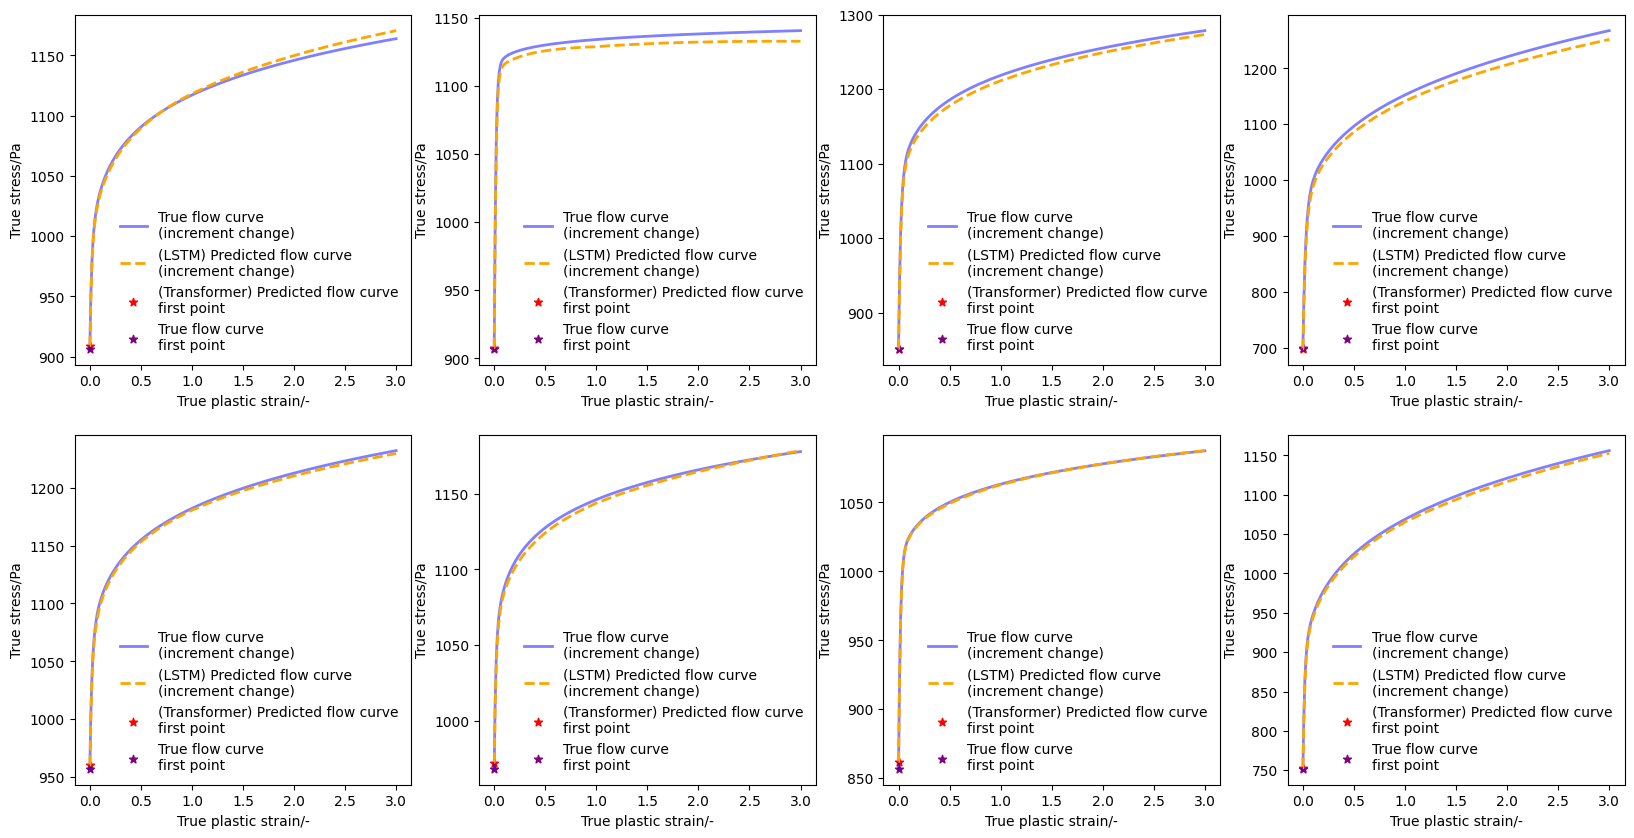

In [27]:
from modules.predict import *

training_data_path = "training_data/CP1000_RD_20C_divided_index_0"

initial_train_source_original_all = torch.load(f"{training_data_path}/initial_train_source_original_all.pt")
initial_train_source_diff_all = torch.load(f"{training_data_path}/initial_train_source_diff_all.pt")
initial_train_target_original_all = torch.load(f"{training_data_path}/initial_train_target_original_all.pt")

# Convert them to float32

initial_train_source_original_all = initial_train_source_original_all.float()
initial_train_source_diff_all = initial_train_source_diff_all.float()
initial_train_target_original_all = initial_train_target_original_all.float()

# Choose randomly 9 samples from training data
random_indices = np.random.choice(initial_train_source_original_all.shape[0], 9, replace=False)

random_initial_train_source_original_all = initial_train_source_original_all[random_indices]
random_initial_train_source_diff_all = initial_train_source_diff_all[random_indices]
random_initial_train_target_original_all = initial_train_target_original_all[random_indices]

print(random_initial_train_source_original_all.shape)
print(random_initial_train_source_diff_all.shape)

random_initial_train_target_original_all_predicted\
  = seq2seq_predict_without_referenced_flow_curve(transformer_model=transformer_model,
                                              LSTM_model=LSTM_model,
                                              exp_source_original_all=random_initial_train_source_original_all,
                                              exp_source_diff_all=random_initial_train_source_diff_all,
                                              scale_source=1, 
                                              scale_target=1,
                                            )
# assert that random_initial_train_target_original_predicted is monotnicially increasing

assert np.all(np.diff(random_initial_train_target_original_all_predicted, axis=1) >= 0)

# Now we plot the predicted flow curves for the randomly selected samples on 3 x 3 grid

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# flatten
ax = ax.flatten()

for i in range(8):

    ax[i].plot(true_plastic_strain, random_initial_train_target_original_all[i], color="blue", label="True flow curve\n(increment change)", alpha=0.5, linewidth=2)
    ax[i].plot(true_plastic_strain, random_initial_train_target_original_all_predicted[i], color="orange",label="(LSTM) Predicted flow curve\n(increment change)", linestyle="--", linewidth=2)
    # scatter the first point with a star marker 
    ax[i].scatter(true_plastic_strain[0], random_initial_train_target_original_all_predicted[i][0], label="(Transformer) Predicted flow curve\nfirst point", marker='*', color='red')
    ax[i].scatter(true_plastic_strain[0], random_initial_train_target_original_all[i][0], label="True flow curve\nfirst point", marker='*', color='purple')
    #ax[i].set_ylim(bottom=0, top=1.3e9)
    ax[i].set_xlabel("True plastic strain/-")
    ax[i].set_ylabel("True stress/Pa")
    ax[i].legend(frameon=False)



### Checking how the models perform on testing data

torch.Size([9, 100, 7])


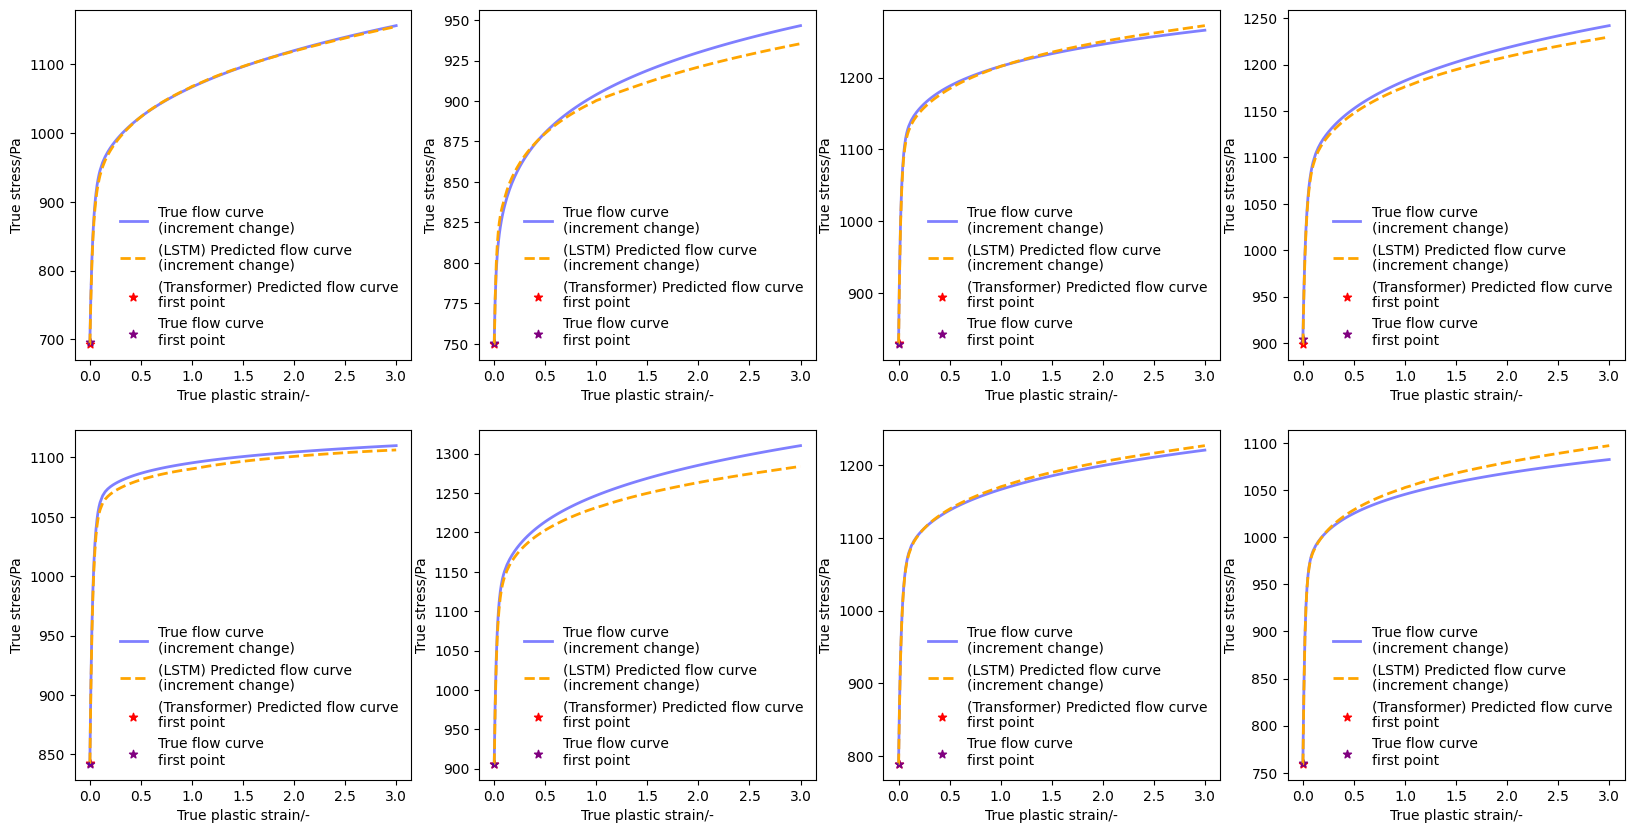

In [28]:
from modules.predict import *

training_data_path = "training_data/CP1000_RD_20C_divided_index_0"

initial_test_source_original_all = torch.load(f"{training_data_path}/initial_test_source_original_all.pt")
initial_test_source_diff_all = torch.load(f"{training_data_path}/initial_test_source_diff_all.pt")
initial_test_target_original_all = torch.load(f"{training_data_path}/initial_test_target_original_all.pt")

# Convert them to float32

initial_test_source_original_all = initial_test_source_original_all.float()
initial_test_source_diff_all = initial_test_source_diff_all.float()
initial_test_target_original_all = initial_test_target_original_all.float()

# Choose randomly 9 samples from training data
random_indices = np.random.choice(initial_test_source_original_all.shape[0], 9, replace=False)

random_initial_test_source_original_all = initial_test_source_original_all[random_indices]
random_initial_test_source_diff_all = initial_test_source_diff_all[random_indices]
random_initial_test_target_original_all = initial_test_target_original_all[random_indices]

print(random_initial_test_source_original_all.shape)

random_initial_test_target_original_all_predicted\
    = seq2seq_predict_without_referenced_flow_curve(transformer_model=transformer_model,
                                                LSTM_model=LSTM_model,
                                                exp_source_original_all=random_initial_test_source_original_all,
                                                exp_source_diff_all=random_initial_test_source_diff_all,
                                                scale_source=1,
                                                scale_target=1,
                                                )

# assert that random_initial_train_target_original_predicted is monotnicially increasing
assert np.all(np.diff(random_initial_test_target_original_all_predicted, axis=1) >= 0)

# Now we plot the predicted flow curves for the randomly selected samples on 3 x 3 grid

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# flatten
ax = ax.flatten()

for i in range(8):

    ax[i].plot(true_plastic_strain, random_initial_test_target_original_all[i], color="blue", label="True flow curve\n(increment change)", alpha=0.5, linewidth=2)
    ax[i].plot(true_plastic_strain, random_initial_test_target_original_all_predicted[i], color="orange",label="(LSTM) Predicted flow curve\n(increment change)", linestyle="--", linewidth=2)
    
    # scatter the first point with a star marker 
    ax[i].scatter(true_plastic_strain[0], random_initial_test_target_original_all_predicted[i][0], label="(Transformer) Predicted flow curve\nfirst point", marker='*', color='red')
    ax[i].scatter(true_plastic_strain[0], random_initial_test_target_original_all[i][0], label="True flow curve\nfirst point", marker='*', color='purple')
    
    ax[i].set_xlabel("True plastic strain/-")
    ax[i].set_ylabel("True stress/Pa")
    ax[i].legend(frameon=False)
    